In [1]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])
print("Total number of messages: ",len(df))
df.head(5)

Total number of messages:  5572


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

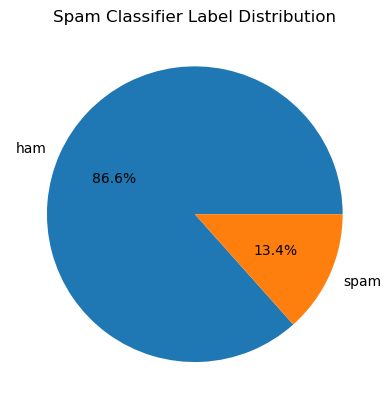

In [6]:
label_counts = df["label"].value_counts()

plt.figure()
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%")
plt.title("Spam Classifier Label Distribution")
plt.show()

# Basic Cleaning

In [7]:
df["text"] = df["text"].str.lower()
df["text"] = df["text"].str.translate(str.maketrans("", "", string.punctuation))
df["text"] = df["text"].str.replace(r"\d+", "", regex=True)
df["text"] = df["text"].str.strip()
df["text"] = df["text"].str.replace(r"\s+", " ", regex=True)

# Tokenization

In [8]:
df["tokens"] = df["text"].apply(word_tokenize)

# Stopword Removal

In [9]:
stop_words = set(stopwords.words("english"))
df["tokens"] = df["tokens"].apply(lambda words: [w for w in words if w not in stop_words])

# Lemmatization

In [10]:
lemmatizer = WordNetLemmatizer()
df["tokens"] = df["tokens"].apply(lambda words: [lemmatizer.lemmatize(w) for w in words])

# Join Tokens Back to Text

In [11]:
df["clean_text"] = df["tokens"].apply(lambda words: " ".join(words))

# Label Encoding

In [12]:
def encode(text):
    if text == 'spam':
        return 1
    elif text == 'ham':
        return 0
df['label'] = df['label'].apply(encode)

In [13]:
df.head(5)

,label,text,tokens,clean_text
0,0,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts st ...
3,0,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,0,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


# Train/Validation/Test Split

In [ ]:
train_df, temp_df = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df["label"]
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"]
)

print(train_df.shape, val_df.shape, test_df.shape)


(3900, 4) (836, 4) (836, 4)


In [15]:
print("Train distribution:")
print(train_df.value_counts("label", normalize=True))

print("\nValidation distribution:")
print(val_df.value_counts("label", normalize=True))

print("\nTest distribution:")
print(test_df.value_counts("label", normalize=True))

Train distribution:
label
0    0.865897
1    0.134103
Name: proportion, dtype: float64

Validation distribution:
label
0    0.866029
1    0.133971
Name: proportion, dtype: float64

Test distribution:
label
0    0.866029
1    0.133971
Name: proportion, dtype: float64


# Storing the splits as train.csv/validation.csv/test.csv


In [16]:
train_df.to_csv("train.csv", index=False)
val_df.to_csv("validate.csv", index=False)
test_df.to_csv("test.csv", index=False)